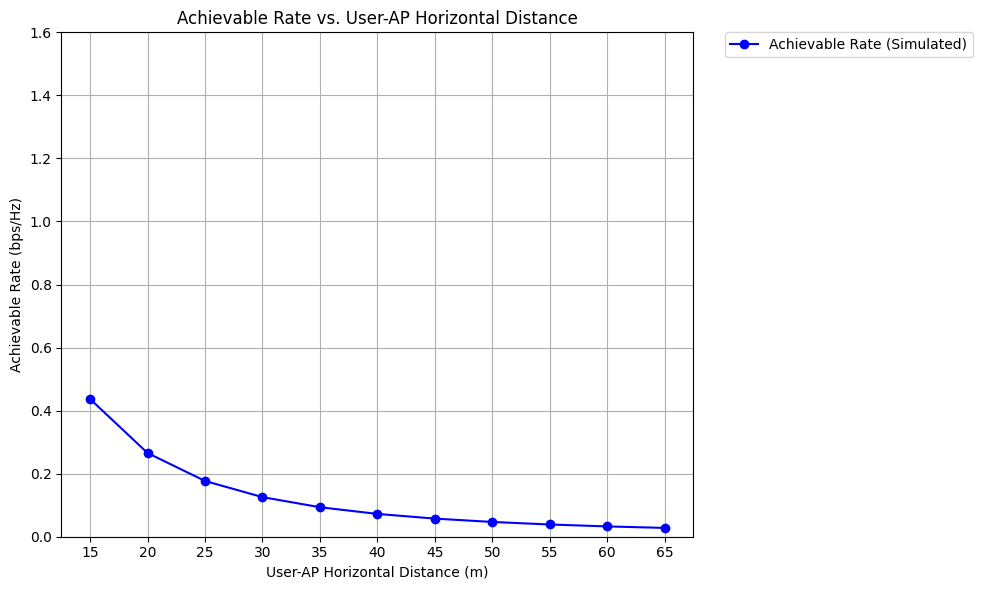

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#  simulation parameters
N = 64
L_cp = 16
Pt = 1
Gamma = 1
sigma2 = 0.1

# Simulation of user-AP distances
distances = np.array([15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65])

# Simulation of channel parameters
M = 8
phi = np.ones(M)
G_m_n = np.random.normal(size=(M, N))
D_n = np.random.normal(size=N)

# Calculate  W_n(phi) for each subcarrier
W_n_phi = np.array([(np.sum(phi * G_m_n[:, n]) + D_n[n])**2 for n in range(N)])

# Calculate achievable rate C(phi) for each distance
C_phi = []
for d in distances:

    Pt_d = Pt / (d ** 2)
    rate = (N / (N + L_cp)) * np.log2(1 + (1 / N) * np.sum((Pt_d * W_n_phi) / (Gamma * sigma2)))
    C_phi.append(rate)


plt.figure(figsize=(10, 6))
plt.plot(distances, C_phi, 'bo-', label="Achievable Rate (Simulated)", markersize=6)


plt.xlabel("User-AP Horizontal Distance (m)")
plt.ylabel("Achievable Rate (bps/Hz)")
plt.title("Achievable Rate vs. User-AP Horizontal Distance")
plt.grid(True)


plt.xticks(np.arange(15, 70, 5))
plt.yticks(np.arange(0, 1.8, 0.2))


plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)


plt.tight_layout()


plt.show()